In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plot_config
plot_config.set_config()

In [2]:
width, height = 13, 2

# Trend

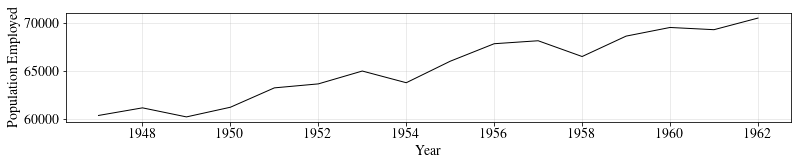

In [3]:
dta = sm.datasets.longley.load_pandas().data
dta.plot(x='YEAR', y='TOTEMP', figsize=(width, height), color='black', legend=None)
plt.ylabel('Population Employed')
plt.xlabel('Year')
plt.savefig('longley.pdf', bbox_inches='tight')

# Seasonality

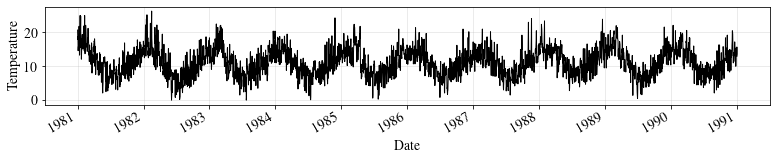

In [13]:
dta = pd.read_csv('daily-min-temperatures.csv', index_col='Date')
dta.index = pd.to_datetime(dta.index)
dta.plot(y='Temp', figsize=(width, height), color='black', legend=None)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.savefig('temperature.pdf', bbox_inches='tight')

# Concept drift